<a href="https://colab.research.google.com/github/ningliz/Hurricane-vs-house-price/blob/main/Ningli_TDI_Project_prelim_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#Set up


In [3]:
MY_PATH = '/content/drive/MyDrive/Colab Notebooks/Project_TDI'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from google.colab import files

plt.rcParams['font.size'] = 13

In [5]:
df_hp = pd.read_csv(MY_PATH+"/zip_house_price.csv", parse_dates=[0], index_col=False)

# Data Cleaning and Exploratory Analyses 

In [6]:
df_hp.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,...,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,329121.0,334059.0,338019.0,346657.0,354457.0,361917.0,369769.0,376112.0,381673.0,386586.0,394154.0,402687.0,412006.0,420541.0,429242.0,436291.0,442139.0,447655.0,452725.0,457455.0,461020.0,465658.0,469811.0,475268.0,478912.0,482464.0,484481.0,488259.0,493127.0,499165.0,503717.0,...,1056751.0,1066218.0,1061489.0,1065629.0,1060590.0,1069555.0,1077300.0,1082938.0,1101403.0,1106902.0,1118061.0,1109151.0,1104925.0,1093784.0,1073845.0,1042718.0,1040381.0,1056542.0,1091406.0,1103597.0,1097648.0,1072148.0,1037495.0,1021313.0,1010954.0,1009921.0,1019725.0,1027286.0,1039824.0,1058235.0,1093037.0,1127372.0,1121064.0,1110998.0,1099806.0,1107533.0,1114251.0,1115204.0,1119620.0,1127675.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,311929.0,313378.0,315344.0,319125.0,322989.0,326767.0,330668.0,335062.0,338888.0,342690.0,346612.0,350927.0,355088.0,358408.0,362212.0,365119.0,368069.0,370481.0,372879.0,375542.0,378529.0,382631.0,386238.0,388784.0,390976.0,393352.0,396645.0,398463.0,400061.0,400541.0,401841.0,...,492453.0,492031.0,491143.0,490223.0,490625.0,491147.0,493049.0,494111.0,492609.0,490791.0,488931.0,488836.0,487848.0,486797.0,486557.0,485590.0,484797.0,483322.0,482671.0,482194.0,482340.0,483957.0,485326.0,486459.0,485554.0,485286.0,486860.0,489000.0,493192.0,496298.0,500225.0,502851.0,503891.0,505210.0,505244.0,507160.0,507826.0,510428.0,514248.0,518202.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,500887.0,504739.0,507445.0,514136.0,522082.0,532837.0,543268.0,551851.0,557627.0,564580.0,572819.0,582608.0,592058.0,602852.0,614142.0,622930.0,629825.0,636113.0,643638.0,648479.0,653604.0,658752.0,666537.0,673080.0,680428.0,687038.0,693996.0,700773.0,708029.0,715294.0,721571.0,...,1499449.0,1492461.0,1494340.0,1511215.0,1525829.0,1539438.0,1539654.0,1515611.0,1478226.0,1439971.0,1437751.0,1427383.0,1424757.0,1418924.0,1423161.0,1416499.0,1385727.0,1372936.0,1387600.0,1426845.0,1453422.0,1460194.0,1456200.0,1465120.0,1465802.0,1464793.0,1467671.0,1477008.0,1489506.0,1486960.0,1486747.0,1485429.0,1466975.0,1456323.0,1442068.0,1453164.0,1454137.0,1454892.0,1457717.0,1468826.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,225325.0,225644.0,226370.0,227601.0,227163.0,226825.0,225702.0,226045.0,225646.0,226321.0,227497.0,228927.0,229550.0,228851.0,227979.0,227122.0,228447.0,229973.0,231156.0,231468.0,231033.0,231096.0,230626.0,229665.0,229077.0,228759.0,229655.0,230329.0,231441.0,232195.0,232058.0,...,337305.0,337754.0,337586.0,337963.0,339053.0,339952.0,340884.0,340634.0,340918.0,340452.0,340308.0,339298.0,338608.0,338047.0,338293.0,338411.0,339205.0,339613.0,339952.0,339667.0,339297.0,338903.0,339196.0,340067.0,341026.0,341468.0,341607.0,342912.0,344506.0,347161.0,350432.0,354939.0,358995.0,363611.0,369082.0,375735.0,382697.0,391365.0,402167.0,413199.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,405926.0,407067.0,409223.0,412990.0,417544.0,421908.0,426505.0,431388.0,435548.0,440519.0,445834.0,451565.

In [7]:
print('# of zip codes:',df_hp["SizeRank"].count())
print('# of months:',df_hp.iloc[0].count()-9)

# of zip codes: 30523
# of months: 260


In [8]:
# Check if there is repeating zip code
print(df_hp["RegionName"].nunique())

30523


In [9]:
# because the zip code is unique, I use zip code as the id. 
df_hp.reset_index()
df_hp=df_hp.set_index('RegionName')

In [30]:
df_1=df_hp.loc[[70032,70124]] # [] slices the rows (by label location) only
df_1_1=df_1.iloc[:,8+67:200].T # select the relevant time range
df_national = df_hp.iloc[:,8+67:200].median(axis = 0)
df_norm = df_1_1.div([115160.0,305767.0])


# df_1_1["National"] = df_national
# df_1_1 = df_1_1.rename(index={0: "Lower 9th ward", 1: "Lakeview", 2: "National"})

# df_norm = df_1_1.div([115160.0,305767.0,177824.5])


In [33]:
df_norm

RegionName,70032,70124
2005-08-31,0.979151,1.369386
2005-09-30,0.989858,1.384829
2005-10-31,1.003369,1.399258
2005-11-30,1.019104,1.409753
2005-12-31,1.023619,1.406856
...,...,...
2015-08-31,1.013885,1.436587
2015-09-30,1.021006,1.453345
2015-10-31,1.029455,1.461198
2015-11-30,1.043922,1.469249


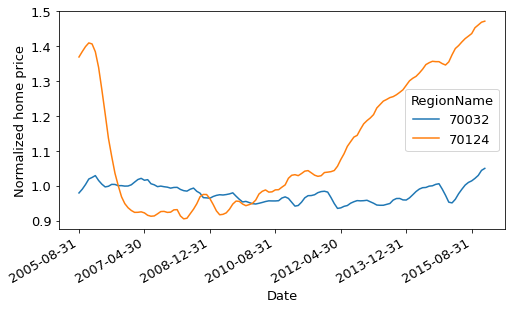

In [34]:
# Plot the home price trend normalized by the price 1 year after Katrina
ax = df_norm.plot(figsize=(8,4))
plt.xlabel('Date')
plt.ylabel('Normalized home price')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right');